# MA124 Maths by Computer: Assignment 3 
## Part B: Geometric Brownian Motion

Student number: 2113104

In [1]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt

We consider numerical simulations of the stochastic differential equation for Geometric Brownian Motion given by 

$$
\dot S(t) = \mu S(t) + \sigma S(t) \xi(t)
$$

We consider the following parameter values: $\mu=0.02$ and $sigma=0.3$

First we plot solutions to this equation

In [2]:
#definition of the stochastic differential equation
def SDE_GBM (S0, tf, mu, sigma, Npaths):
    Nsteps = 365*tf

    # Generate the time grid and solution array
    t, dt = np.linspace(0,tf,Nsteps+1,retstep=True)
    S = np.zeros((Nsteps+1,Npaths))
    root_dt = np.sqrt(dt)

    # Time step starting from initial condition
    S[0,:] = S0;
    for n in range(Nsteps):
        F_of_S = mu*S[n,:]
        S[n+1,:] =  S[n,:] + dt * F_of_S + sigma * root_dt * np.random.randn(Npaths)*S[n,:]
        
    return t,S

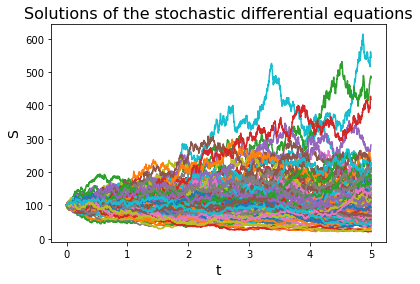

In [3]:
#passing parameters to the functions and plotting
#Geometric Brownian Motion with parameters mu=0.02 and sigma=0.3
t, S=(SDE_GBM(100, 5, 0.03, 0.3, 100))
plt.plot(t,S)
plt.title("Solutions of the stochastic differential equations", fontsize=16)
plt.xlabel("t", fontsize=14)
plt.ylabel("S", fontsize=14)
plt.show()

This graph shows the solutions to the stochastic differential equation known as Geometric Brownian Motion corresonding to 5 years time.

From the graph we can say that the solutions are usually simmilar oscilating from S=100 to +/-100. 
The final position of the solutions is likely to be between 0 and 250. The final position is unlikely to be more than 300.

---
Now we will make a plot showing the mean +/- standard deviation for the 2000 paths as a function of time,

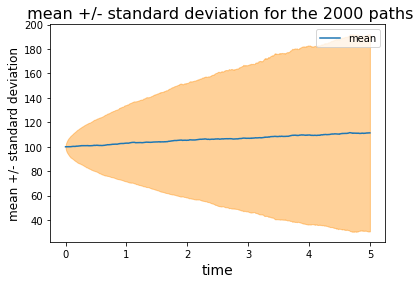

In [4]:
#producting 2000 samples 
t1, S1=(SDE_GBM(100, 5, 0.02, 0.3, 2000))

#calculating mean and standard deviation
S1_mean = np.mean(S1,1)
S1_std = np.std(S1,1)

# Plotting shaded region between S_mean - S_std and S_mean + S_std 
plt.fill_between(t, 
                 S1_mean - S1_std, 
                 S1_mean + S1_std, 
                 alpha=0.4, color="darkorange")
plt.title(" mean +/- standard deviation for the 2000 paths", fontsize=16)
plt.xlabel("time", fontsize=14)
plt.ylabel("mean +/- standard deviation", fontsize=12)

plt.plot(t,S1_mean, label='mean')
plt.legend()
plt.show()


This plot shows that the standard deviation is getting larger over time and the maximum absolute value of standard deviation is around 100. 
Also it shows that the mean is almost constant for the whole time.

---
Here we plot and interpret histograms as well as mean and median values.

mean at day 100 is  100.92865673413698
standard deviation at day 100 is 15.596997473737995

mean at day 500 is 103.70628804864403
standard deviation at day 500 is 36.85156936962714

mean at the last day is 111.35297184678919
standard deviation at the last day is 80.6077471324364


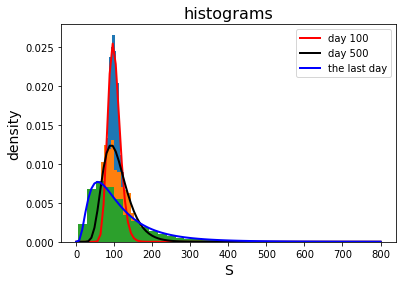

In [5]:
#plotting histograms
plt.hist(S1[100,:], bins=31, density=True)
plt.hist(S1[500,:], bins=31, density=True)
plt.hist(S1[-1,:], bins=31, density=True)


#calculatig means and standaard deviations
mean_100=np.mean(S1[100,:])
std_100=np.std(S1[100,:])
print("mean at day 100 is " ,mean_100)
print("standard deviation at day 100 is", std_100)
print()

mean_500=np.mean(S1[500,:])
std_500=np.std(S1[500,:])
print("mean at day 500 is" ,mean_500)
print("standard deviation at day 500 is", std_500)
print()

mean_last=np.mean(S1[-1,:])
std_last=np.std(S1[-1,:])
print("mean at the last day is" ,mean_last)
print("standard deviation at the last day is", std_last)


#first part of challenge section
#plotting the log-normal distribution corresponding to histograms
from scipy import stats
x=np.linspace(0,800,101)

#the function which returns parameters for distribution
#print(scipy.stats.lognorm.fit(S[100,:], floc=0))
y=stats.lognorm.pdf(x, 0.16, loc=0, scale=99)
plt.plot(x, y, lw=2, color='red', label='day 100')

#print(scipy.stats.lognorm.fit(S[500,:], floc=0))
y1=stats.lognorm.pdf(x, 0.33, loc=0, scale=102.44)
plt.plot(x, y1, lw=2,color='black', label='day 500')


#print(scipy.stats.lognorm.fit(S[-1,:], floc=0))
y2= stats.lognorm.pdf(x, 0.71, loc=0, scale=93.75)
plt.plot(x, y2, lw=2, color='blue', label='the last day')

plt.title("histograms", fontsize=16)
plt.xlabel("S", fontsize=14)
plt.ylabel("density", fontsize=14)
plt.legend()
plt.show()

This plot shows histograms for days 100, 500 and the last one, as well as the log-normal distribution for each day.

In [6]:
#printing median 
from statistics import median
print("Median of day 100 is", median(S1[100,:]))
print("Median of day 500 is", median(S1[500,:]))
print("Median of last day is", median(S1[-1,:]))

Median of day 100 is 99.6694338121149
Median of day 500 is 96.51373810837009
Median of last day is 89.9329756697318


The mean is getting slightly bigger but it is almost constant and same as the initial condition of S. It means that the stocks are likely to be stable. 
Median of these distributions is less than the mean because smaller solutions are more likely to occur (as the grah is left skewed). 
There is small possibility that a very large solution will occur (that the stocks will grow very fast), however they make the mean bigger.